In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numba
import cv2

In [2]:
import tensorflow as tf

In [24]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import adam_v2
from keras.losses import binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
import glob

In [5]:
df='/home/mitra/Machine_Learning/Drone vs Bird/BirdVsDrone'

In [6]:
os.listdir(df)

['Drones', 'Birds']

In [7]:
bwei, bhei,ba=10000, 10000, 1000
bird_img=[]
filename=os.listdir(df)
for filename in glob.glob(df+"/Birds/*"):
    bird_img.append(mpimg.imread(filename))
    n=mpimg.imread(filename)
    nwei, nhei, a=n.shape
    bwei=min(bwei, nwei)
    bhei=min(bhei, nhei)
    ba=min(a, ba)

In [8]:
dwei, dhei, da=10000, 10000, 100
bird_img=[]
filename=os.listdir(df)
for filename in glob.glob(df+"/Drones/*"):
    bird_img.append(mpimg.imread(filename))
    n=mpimg.imread(filename)
    nwei, nhei, a=n.shape
    dwei=min(dwei, nwei)
    dhei=min(dhei, nhei)
    da=min(a, da)

In [9]:
print(dwei, dhei, da)

114 183 3


In [10]:
Img_WID=150
Img_HEI=150
channel=3
imput_shape=(Img_WID, Img_HEI, channel)
no_classes=2
epochs=50
batch_size=32

In [33]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(150, 150,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.50))


model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.50))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units=2, activation='sigmoid'))


In [41]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 73, 73, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                  

In [43]:
train_datagen=ImageDataGenerator(rescale=1./255,
                 shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split= 0.3)
train_generator=train_datagen.flow_from_directory(df, target_size=(150, 150), batch_size=batch_size,
                                                  class_mode='binary', subset='training')
validation_generator=train_datagen.flow_from_directory(df, target_size=(150, 150), batch_size=batch_size,
                                                  class_mode='binary',shuffle=False, subset='validation')

Found 579 images belonging to 2 classes.
Found 247 images belonging to 2 classes.


In [44]:
history=model.fit(train_generator,
                  steps_per_epoch=train_generator.samples//batch_size,
                  validation_data=validation_generator,
                  validation_steps=validation_generator.samples//batch_size,
                  epochs=10)

Epoch 1/10
18/18 [==============================] - 15s 808ms/step - loss: 0.7074 - accuracy: 0.5375 - val_loss: 0.6924 - val_accuracy: 0.4688
Epoch 2/10
18/18 [==============================] - 15s 818ms/step - loss: 0.6943 - accuracy: 0.4973 - val_loss: 0.6886 - val_accuracy: 0.4688
Epoch 3/10
18/18 [==============================] - 15s 828ms/step - loss: 0.6815 - accuracy: 0.5192 - val_loss: 0.6636 - val_accuracy: 0.4821
Epoch 4/10
18/18 [==============================] - 15s 822ms/step - loss: 0.6209 - accuracy: 0.6581 - val_loss: 0.5274 - val_accuracy: 0.8482
Epoch 5/10
18/18 [==============================] - 15s 883ms/step - loss: 0.5888 - accuracy: 0.6965 - val_loss: 0.5665 - val_accuracy: 0.7991
Epoch 6/10
18/18 [==============================] - 16s 894ms/step - loss: 0.5848 - accuracy: 0.6892 - val_loss: 0.4810 - val_accuracy: 0.8527
Epoch 7/10
18/18 [==============================] - 16s 894ms/step - loss: 0.5628 - accuracy: 0.7038 - val_loss: 0.4856 - val_accuracy: 0.8348

In [45]:
history=model.fit(train_generator,
                  steps_per_epoch=train_generator.samples//batch_size,
                  validation_data=validation_generator,
                  validation_steps=validation_generator.samples//batch_size,
                  epochs=125, initial_epoch=10)

Epoch 11/125
18/18 [==============================] - 16s 891ms/step - loss: 0.5194 - accuracy: 0.7477 - val_loss: 0.4262 - val_accuracy: 0.8661
Epoch 12/125
18/18 [==============================] - 16s 889ms/step - loss: 0.5068 - accuracy: 0.7532 - val_loss: 0.4214 - val_accuracy: 0.8661
Epoch 13/125
18/18 [==============================] - 16s 883ms/step - loss: 0.4917 - accuracy: 0.7733 - val_loss: 0.3898 - val_accuracy: 0.8795
Epoch 14/125
18/18 [==============================] - 16s 922ms/step - loss: 0.5005 - accuracy: 0.7660 - val_loss: 0.4257 - val_accuracy: 0.8571
Epoch 15/125
18/18 [==============================] - 16s 889ms/step - loss: 0.5403 - accuracy: 0.7203 - val_loss: 0.5219 - val_accuracy: 0.8795
Epoch 16/125
18/18 [==============================] - 16s 892ms/step - loss: 0.5024 - accuracy: 0.7697 - val_loss: 0.4339 - val_accuracy: 0.8259
Epoch 17/125
18/18 [==============================] - 16s 888ms/step - loss: 0.4907 - accuracy: 0.7514 - val_loss: 0.4180 - val_ac

Epoch 68/125
18/18 [==============================] - 17s 989ms/step - loss: 0.3029 - accuracy: 0.8940 - val_loss: 0.2427 - val_accuracy: 0.8973
Epoch 69/125
18/18 [==============================] - 16s 908ms/step - loss: 0.2167 - accuracy: 0.9049 - val_loss: 0.1921 - val_accuracy: 0.9420
Epoch 70/125
18/18 [==============================] - 16s 904ms/step - loss: 0.1809 - accuracy: 0.9250 - val_loss: 0.1630 - val_accuracy: 0.9598
Epoch 71/125
18/18 [==============================] - 16s 895ms/step - loss: 0.2270 - accuracy: 0.8940 - val_loss: 0.1853 - val_accuracy: 0.9286
Epoch 72/125
18/18 [==============================] - 16s 888ms/step - loss: 0.2295 - accuracy: 0.9122 - val_loss: 0.2337 - val_accuracy: 0.9018
Epoch 73/125
18/18 [==============================] - 16s 883ms/step - loss: 0.2027 - accuracy: 0.9086 - val_loss: 0.2285 - val_accuracy: 0.9241
Epoch 74/125
18/18 [==============================] - 17s 964ms/step - loss: 0.2311 - accuracy: 0.9013 - val_loss: 0.1733 - val_ac

18/18 [==============================] - 16s 900ms/step - loss: 0.1022 - accuracy: 0.9580 - val_loss: 0.3087 - val_accuracy: 0.8795
Epoch 125/125
18/18 [==============================] - 16s 889ms/step - loss: 0.1811 - accuracy: 0.9305 - val_loss: 0.3155 - val_accuracy: 0.8795


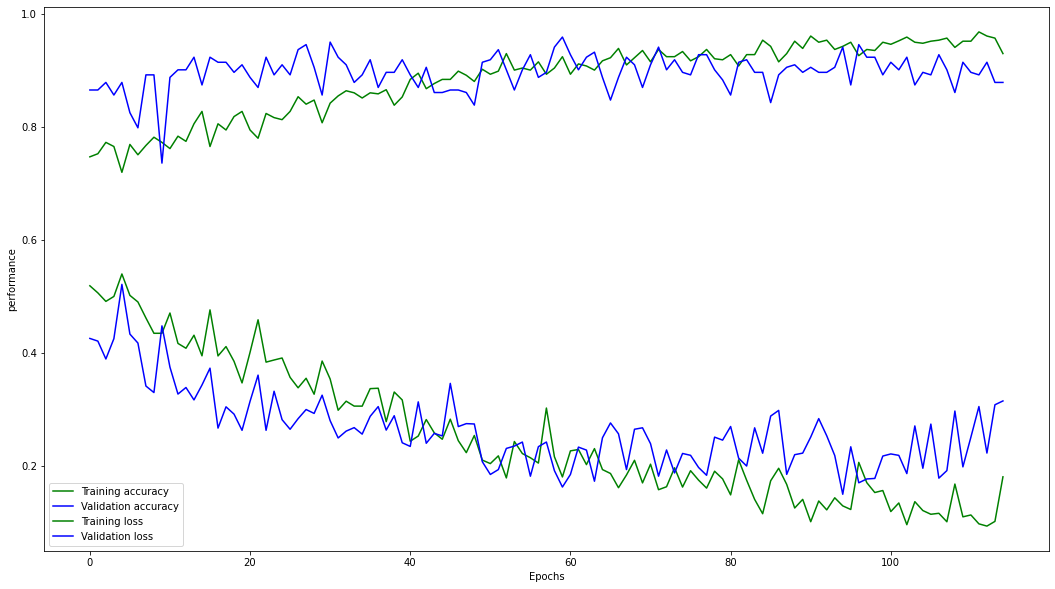

In [46]:
plt.figure(figsize=(18, 10))
plt.plot(history.history['accuracy'],color='g',label='Training accuracy')
plt.plot(history.history['val_accuracy'],color='b',label='Validation accuracy')

plt.plot(history.history['loss'],color='g',label='Training loss')
plt.plot(history.history['val_loss'],color='b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('performance')
plt.legend()

plt.show()

In [49]:
model.evaluate(validation_generator)

8/8 [==============================] - 3s 444ms/step - loss: 0.2734 - accuracy: 0.8785


[0.27342480421066284, 0.8785424828529358]

In [50]:
pred=model.predict(validation_generator)
Y_pred=model.predict(validation_generator, len(validation_generator)//batch_size+1)

In [51]:
y_pred=np.argmax(Y_pred, axis=1)

In [52]:
print('Confusion matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion matrix
[[ 91  28]
 [  5 123]]


In [53]:
print('Classification report')
target_name=['Drones', 'Birds']
print(classification_report(validation_generator.classes, y_pred, target_names=target_name))

Classification report
              precision    recall  f1-score   support

      Drones       0.95      0.76      0.85       119
       Birds       0.81      0.96      0.88       128

    accuracy                           0.87       247
   macro avg       0.88      0.86      0.86       247
weighted avg       0.88      0.87      0.86       247

